In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import statsmodels.api as sm
import gc
pd.set_option('display.max_columns', None)

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### **一、截面回归,计算alpha收益截面预测值**

In [2]:
#读取风格因子
style = pd.read_hdf('D:/191alphas/style.h5', key = 'style')

In [3]:
style

,code,date,return,Beta,Momentum,Size,EarningsYield,Volatility,Growth,Value,Leverage,Liquidity,110,210,220,230,240,270,280,330,340,350,360,370,410,420,430,450,460,480,490,510,610,620,630,640,650,710,720,730
0,2,2012-03-12,-0.029070,-0.812246,1.490566,2.794474,2.240843,-1.103205,0.359292,0.857649,1.277298,-0.801097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,2012-03-12,-0.014599,-0.240366,0.763640,0.050347,2.240843,-0.196264,0.059493,0.406627,1.277298,-0.490862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12,2012-03-12,-0.000898,1.366816,-0.422765,1.067204,2.240843,0.865043,0.199437,0.345652,1.277298,1.094960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,14,2012-03-12,-0.011382,1.552692,-1.132155,-1.435629,-0.357655,-0.919319,1.808307,0.132998,1.277298,0.138492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,2012-03-12,-0.018568,0.678844,-0.742624,-0.547852,-2.158618,-1.120274,-0.524423,3.633875,1.277298,0.436618,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195421,688366,2022-01-28,0.010404,2.835079,-1.179211,0.679605,0.084464,0.955572,-0.011428,-0.252274,-0.813217,0.158871,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6195422,688368,2022-01-28,-0.023391,2.835079,0.935232,0.614274,0.511884,1.935053,2.091273,-1.024680,-0.878403,1.023957,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6195423,688369,2022-01-28,0.028353,2.835079,-0.436962,-0.255763,-0.247523,-0.654609,0.525377,-0.701766,-0.879978,-0.246893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6195424,688388,2022-01-28,-0.031782,2.835079,1.167903,1.265466,-0.190934,1.036084,1.253576,-1.093043,0.325587,0.548108,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
#按resid_ret1d的IR值对因子进行排序，每二十个因子一档
alpha_head20_list = ['alpha_15_resid','alpha_120_resid','alpha_80_resid','alpha_32_resid','alpha_16_resid','alpha_42_resid','alpha_13_resid',
                     'alpha_124_resid','alpha_102_resid','alpha_5_resid','alpha_168_resid','alpha_11_resid','alpha_36_resid','alpha_114_resid',
                     'alpha_12_resid','alpha_74_resid','alpha_140_resid','alpha_179_resid','alpha_108_resid','alpha_9_resid']

In [3]:
alpha_head40_list = ['alpha_15_resid','alpha_120_resid','alpha_80_resid','alpha_32_resid','alpha_16_resid','alpha_42_resid','alpha_13_resid',
                     'alpha_124_resid','alpha_102_resid','alpha_5_resid','alpha_168_resid','alpha_11_resid','alpha_36_resid','alpha_114_resid',
                     'alpha_12_resid','alpha_74_resid','alpha_140_resid','alpha_179_resid','alpha_108_resid','alpha_9_resid','alpha_68_resid',
                     'alpha_90_resid','alpha_139_resid','alpha_109_resid','alpha_62_resid','alpha_1_resid','alpha_107_resid','alpha_145_resid',
                     'alpha_176_resid','alpha_60_resid','alpha_188_resid','alpha_91_resid','alpha_105_resid','alpha_158_resid','alpha_121_resid',
                     'alpha_75_resid','alpha_163_resid','alpha_99_resid','alpha_171_resid','alpha_48_resid']

In [4]:
alpha_head60_list = ['alpha_15_resid','alpha_120_resid','alpha_80_resid','alpha_32_resid','alpha_16_resid','alpha_42_resid','alpha_13_resid',
                     'alpha_124_resid','alpha_102_resid','alpha_5_resid','alpha_168_resid','alpha_11_resid','alpha_36_resid','alpha_114_resid',
                     'alpha_12_resid','alpha_74_resid','alpha_140_resid','alpha_179_resid','alpha_108_resid','alpha_9_resid','alpha_68_resid',
                     'alpha_90_resid','alpha_139_resid','alpha_109_resid','alpha_62_resid','alpha_1_resid','alpha_107_resid','alpha_145_resid',
                     'alpha_176_resid','alpha_60_resid','alpha_188_resid','alpha_91_resid','alpha_105_resid','alpha_158_resid','alpha_121_resid',
                     'alpha_75_resid','alpha_163_resid','alpha_99_resid','alpha_171_resid','alpha_48_resid','alpha_3_resid','alpha_83_resid',
                     'alpha_100_resid','alpha_4_resid','alpha_156_resid','alpha_73_resid','alpha_55_resid','alpha_97_resid','alpha_43_resid',
                     'alpha_150_resid','alpha_95_resid','alpha_35_resid','alpha_155_resid','alpha_180_resid','alpha_41_resid','alpha_136_resid',
                     'alpha_24_resid','alpha_70_resid','alpha_141_resid','alpha_40_resid']

In [5]:
alpha_head80_list = ['alpha_15_resid','alpha_120_resid','alpha_80_resid','alpha_32_resid','alpha_16_resid','alpha_42_resid','alpha_13_resid',
                     'alpha_124_resid','alpha_102_resid','alpha_5_resid','alpha_168_resid','alpha_11_resid','alpha_36_resid','alpha_114_resid',
                     'alpha_12_resid','alpha_74_resid','alpha_140_resid','alpha_179_resid','alpha_108_resid','alpha_9_resid','alpha_68_resid',
                     'alpha_90_resid','alpha_139_resid','alpha_109_resid','alpha_62_resid','alpha_1_resid','alpha_107_resid','alpha_145_resid',
                     'alpha_176_resid','alpha_60_resid','alpha_188_resid','alpha_91_resid','alpha_105_resid','alpha_158_resid','alpha_121_resid',
                     'alpha_75_resid','alpha_163_resid','alpha_99_resid','alpha_171_resid','alpha_48_resid','alpha_3_resid','alpha_83_resid',
                     'alpha_100_resid','alpha_4_resid','alpha_156_resid','alpha_73_resid','alpha_55_resid','alpha_97_resid','alpha_43_resid',
                     'alpha_150_resid','alpha_95_resid','alpha_35_resid','alpha_155_resid','alpha_180_resid','alpha_41_resid','alpha_136_resid',
                     'alpha_24_resid','alpha_70_resid','alpha_141_resid','alpha_40_resid','alpha_182_resid','alpha_77_resid','alpha_128_resid',
                     'alpha_104_resid','alpha_191_resid','alpha_118_resid','alpha_33_resid','alpha_117_resid','alpha_14_resid','alpha_130_resid',
                     'alpha_122_resid','alpha_185_resid','alpha_72_resid','alpha_82_resid','alpha_47_resid','alpha_81_resid','alpha_69_resid',
                     'alpha_17_resid','alpha_94_resid','alpha_184_resid']

In [6]:
alpha_head100_list =['alpha_15_resid','alpha_120_resid','alpha_80_resid','alpha_32_resid','alpha_16_resid','alpha_42_resid','alpha_13_resid',
                     'alpha_124_resid','alpha_102_resid','alpha_5_resid','alpha_168_resid','alpha_11_resid','alpha_36_resid','alpha_114_resid',
                     'alpha_12_resid','alpha_74_resid','alpha_140_resid','alpha_179_resid','alpha_108_resid','alpha_9_resid','alpha_68_resid',
                     'alpha_90_resid','alpha_139_resid','alpha_109_resid','alpha_62_resid','alpha_1_resid','alpha_107_resid','alpha_145_resid',
                     'alpha_176_resid','alpha_60_resid','alpha_188_resid','alpha_91_resid','alpha_105_resid','alpha_158_resid','alpha_121_resid',
                     'alpha_75_resid','alpha_163_resid','alpha_99_resid','alpha_171_resid','alpha_48_resid','alpha_3_resid','alpha_83_resid',
                     'alpha_100_resid','alpha_4_resid','alpha_156_resid','alpha_73_resid','alpha_55_resid','alpha_97_resid','alpha_43_resid',
                     'alpha_150_resid','alpha_95_resid','alpha_35_resid','alpha_155_resid','alpha_180_resid','alpha_41_resid','alpha_136_resid',
                     'alpha_24_resid','alpha_70_resid','alpha_141_resid','alpha_40_resid','alpha_182_resid','alpha_77_resid','alpha_128_resid',
                     'alpha_104_resid','alpha_191_resid','alpha_118_resid','alpha_33_resid','alpha_117_resid','alpha_14_resid','alpha_130_resid',
                     'alpha_122_resid','alpha_185_resid','alpha_72_resid','alpha_82_resid','alpha_47_resid','alpha_81_resid','alpha_69_resid',
                     'alpha_17_resid','alpha_94_resid','alpha_184_resid','alpha_84_resid','alpha_135_resid','alpha_113_resid','alpha_87_resid',
                     'alpha_59_resid','alpha_61_resid','alpha_29_resid','alpha_159_resid','alpha_151_resid','alpha_177_resid','alpha_111_resid',
                     'alpha_96_resid','alpha_101_resid','alpha_54_resid','alpha_152_resid','alpha_52_resid','alpha_169_resid','alpha_27_resid',
                     'alpha_58_resid','alpha_53_resid']

In [7]:
alpha_head120_list = ['alpha_15_resid','alpha_120_resid','alpha_80_resid','alpha_32_resid','alpha_16_resid','alpha_42_resid',
                      'alpha_13_resid','alpha_124_resid','alpha_102_resid','alpha_5_resid','alpha_168_resid','alpha_11_resid',
                      'alpha_36_resid','alpha_114_resid','alpha_12_resid','alpha_74_resid','alpha_140_resid','alpha_179_resid',
                      'alpha_108_resid','alpha_9_resid','alpha_68_resid','alpha_90_resid','alpha_139_resid','alpha_109_resid',
                      'alpha_62_resid','alpha_1_resid','alpha_107_resid','alpha_145_resid','alpha_176_resid','alpha_60_resid',
                      'alpha_188_resid','alpha_91_resid','alpha_105_resid','alpha_158_resid','alpha_121_resid','alpha_75_resid',
                      'alpha_163_resid','alpha_99_resid','alpha_171_resid','alpha_48_resid','alpha_3_resid','alpha_83_resid',
                      'alpha_100_resid','alpha_4_resid','alpha_156_resid','alpha_73_resid','alpha_55_resid','alpha_97_resid',
                      'alpha_43_resid','alpha_150_resid','alpha_95_resid','alpha_35_resid','alpha_155_resid','alpha_180_resid',
                      'alpha_41_resid','alpha_136_resid','alpha_24_resid','alpha_70_resid','alpha_141_resid','alpha_40_resid',
                      'alpha_182_resid','alpha_77_resid','alpha_128_resid','alpha_104_resid','alpha_191_resid','alpha_118_resid',
                      'alpha_33_resid','alpha_117_resid','alpha_14_resid','alpha_130_resid','alpha_122_resid','alpha_185_resid',
                      'alpha_72_resid','alpha_82_resid','alpha_47_resid','alpha_81_resid','alpha_69_resid','alpha_17_resid',
                      'alpha_94_resid','alpha_184_resid','alpha_84_resid','alpha_135_resid','alpha_113_resid','alpha_87_resid',
                      'alpha_59_resid','alpha_61_resid','alpha_29_resid','alpha_159_resid','alpha_151_resid','alpha_177_resid',
                      'alpha_111_resid','alpha_96_resid','alpha_101_resid','alpha_54_resid','alpha_152_resid','alpha_52_resid',
                      'alpha_169_resid','alpha_27_resid','alpha_58_resid','alpha_53_resid','alpha_92_resid','alpha_20_resid',
                      'alpha_89_resid','alpha_18_resid','alpha_106_resid','alpha_19_resid','alpha_57_resid','alpha_25_resid',
                      'alpha_88_resid','alpha_133_resid','alpha_71_resid','alpha_23_resid','alpha_67_resid','alpha_50_resid',
                      'alpha_51_resid','alpha_49_resid','alpha_26_resid','alpha_39_resid','alpha_79_resid','alpha_31_resid']

In [8]:
alphas_pred = pd.read_hdf('D:/191alphas/resid_120.h5', key = 'resid_120')

In [9]:
alphas_pred

,code,date,alpha_15_resid,alpha_120_resid,alpha_80_resid,alpha_32_resid,alpha_16_resid,alpha_42_resid,alpha_13_resid,alpha_124_resid,alpha_102_resid,alpha_5_resid,alpha_168_resid,alpha_11_resid,alpha_36_resid,alpha_114_resid,alpha_12_resid,alpha_74_resid,alpha_140_resid,alpha_179_resid,alpha_108_resid,alpha_9_resid,alpha_68_resid,alpha_90_resid,alpha_139_resid,alpha_109_resid,alpha_62_resid,alpha_1_resid,alpha_107_resid,alpha_145_resid,alpha_176_resid,alpha_60_resid,alpha_188_resid,alpha_91_resid,alpha_105_resid,alpha_158_resid,alpha_121_resid,alpha_75_resid,alpha_163_resid,alpha_99_resid,alpha_171_resid,alpha_48_resid,alpha_3_resid,alpha_83_resid,alpha_100_resid,alpha_4_resid,alpha_156_resid,alpha_73_resid,alpha_55_resid,alpha_97_resid,alpha_43_resid,alpha_150_resid,alpha_95_resid,alpha_35_resid,alpha_155_resid,alpha_180_resid,alpha_41_resid,alpha_136_resid,alpha_24_resid,alpha_70_resid,alpha_141_resid,alpha_40_resid,alpha_182_resid,alpha_77_resid,alpha_128_resid,alpha_104_resid,alpha_191_resid,alpha_118_resid,alpha_33_resid,alpha_117_resid,alpha_14_resid,alpha_130_resid,alpha_122_resid,alpha_185_resid,alpha_72_resid,alpha_82_resid,alpha_47_resid,alpha_81_resid,alpha_69_resid,alpha_17_resid,alpha_94_resid,alpha_184_resid,alpha_84_resid,alpha_135_resid,alpha_113_resid,alpha_87_resid,alpha_59_resid,alpha_61_resid,alpha_29_resid,alpha_159_resid,alpha_151_resid,alpha_177_resid,alpha_111_resid,alpha_96_resid,alpha_101_resid,alpha_54_resid,alpha_152_resid,alpha_52_resid,alpha_169_resid,alpha_27_resid,alpha_58_resid,alpha_53_resid,alpha_92_resid,alpha_20_resid,alpha_89_resid,alpha_18_resid,alpha_106_resid,alpha_19_resid,alpha_57_resid,alpha_25_resid,alpha_88_resid,alpha_133_resid,alpha_71_resid,alpha_23_resid,alpha_67_resid,alpha_50_resid,alpha_51_resid,alpha_49_resid,alpha_26_resid,alpha_39_resid,alpha_79_resid,alpha_31_resid
0,2,2012-03-12,-1.602739,1.626140,-0.081660,0.611717,0.693576,0.861617,-1.761898,0.733955,-0.546535,-0.818990,-0.330275,1.455688,0.501387,0.656566,0.602879,0.017125,-0.164796,0.502059,0.869972,-0.048082,0.192598,0.952547,0.895067,-0.302072,1.219929,-0.140041,-1.601388,0.606890,1.156327,-1.904871,-0.283640,-0.268408,0.960317,-0.078627,0.818743,-0.243160,0.135986,0.909890,0.262776,0.745712,0.474686,0.656933,-1.008466,-0.143491,0.301395,0.538113,-0.676405,-1.349403,1.700764,-1.058514,-1.446425,-0.129771,1.098819,-1.858525,-0.313333,0.363061,-0.173384,-1.571160,0.883326,0.464421,-0.630488,-0.857139,-0.452722,-0.205998,-0.155412,-0.486610,-0.604694,0.310225,0.112082,1.473051,-0.077401,-0.798611,-0.106754,-0.080194,-0.113753,-1.162755,-0.461433,0.836605,-0.853941,-0.321292,-0.719983,0.001131,0.031926,0.229781,0.680581,-0.753583,1.910613,-0.211728,0.319570,-0.482795,2.946412,-0.370525,0.308530,0.778233,0.112568,0.014781,0.240157,-0.035084,0.955239,0.406532,0.618770,-0.055764,-0.034183,-0.168210,0.285456,-0.160036,-0.200737,0.228813,-0.106385,-0.816811,0.118874,0.997770,-0.009776,0.095599,0.095599,0.095599,0.391821,1.381745,0.050911,0.149739
1,6,2012-03-12,0.910010,0.611230,0.666330,1.391979,-0.851916,0.484774,0.150875,0.618371,0.729346,0.092216,0.761016,0.405506,-1.116923,0.092638,-0.881786,-0.786347,-1.388163,0.253472,0.071547,0.113629,0.238630,-1.506364,0.762885,-1.101249,-0.887465,0.107894,0.958166,0.074082,-0.405569,-1.051612,-0.990899,1.542951,0.808585,-1.277800,0.841771,0.351790,0.510393,-1.110414,0.436135,1.066041,-0.237104,-1.644172,-0.318391,0.380781,-0.459653,0.918273,-0.561283,-0.722863,-1.022130,0.473917,0.179639,0.320827,0.495430,0.320951,-0.165869,0.741375,-0.209915,0.067514,-0.352915,-1.559801,0.889743,1.274975,-0.576808,-0.991439,-1.407494,-1.047555,0.077825,0.519786,-0.115682,-0.396586,-0.961705,-0.726448,0.152272,0.299541,0.188008,0.036328,-0.667892,0.017147,-1.403264,0.583001,-0.411318,-0.582367,0.054629,1.243350,0.035205,-1.146001,-0.786013,-0.661876,0.188187,-0.554131,0.023264,-0.366507,0.205175,0.795831,-0.208176,-0.772604,-0.162225,-1.281150,-1.254748,-1.620105,-2.301357,-0.769616,-0.296403,0.0

In [10]:
Resid_ret_1d_20 = pd.read_csv('D:/191alphas/Resid_ret_1d_20.csv')
Resid_ret_1d_40 = pd.read_csv('D:/191alphas/Resid_ret_1d_40.csv')
Resid_ret_1d_60 = pd.read_csv('D:/191alphas/Resid_ret_1d_60.csv')
Resid_ret_1d_80 = pd.read_csv('D:/191alphas/Resid_ret_1d_80.csv')
Resid_ret_1d_100 = pd.read_csv('D:/191alphas/Resid_ret_1d_100.csv')
Resid_ret_1d_120 = pd.read_csv('D:/191alphas/Resid_ret_1d_120.csv')

#### **120个因子的预测值**

In [11]:
Resid_ret_1d_120.loc[:,'Unnamed: 0'] = pd.to_datetime(Resid_ret_1d_120.loc[:,'Unnamed: 0'])

In [12]:
Resid_ret_1d_120.set_index('Unnamed: 0', inplace=True)

In [13]:
Resid_ret_1d_120mean = Resid_ret_1d_120.rolling(250).mean()

In [14]:
Resid_ret_1d_120mean.dropna(inplace=True)

In [15]:
Resid_ret_1d_120mean

,alpha_15_resid,alpha_120_resid,alpha_80_resid,alpha_32_resid,alpha_16_resid,alpha_42_resid,alpha_13_resid,alpha_124_resid,alpha_102_resid,alpha_5_resid,alpha_168_resid,alpha_11_resid,alpha_36_resid,alpha_114_resid,alpha_12_resid,alpha_74_resid,alpha_140_resid,alpha_179_resid,alpha_108_resid,alpha_9_resid,alpha_68_resid,alpha_90_resid,alpha_139_resid,alpha_109_resid,alpha_62_resid,alpha_1_resid,alpha_107_resid,alpha_145_resid,alpha_176_resid,alpha_60_resid,alpha_188_resid,alpha_91_resid,alpha_105_resid,alpha_158_resid,alpha_121_resid,alpha_75_resid,alpha_163_resid,alpha_99_resid,alpha_171_resid,alpha_48_resid,alpha_3_resid,alpha_83_resid,alpha_100_resid,alpha_4_resid,alpha_156_resid,alpha_73_resid,alpha_55_resid,alpha_97_resid,alpha_43_resid,alpha_150_resid,alpha_95_resid,alpha_35_resid,alpha_155_resid,alpha_180_resid,alpha_41_resid,alpha_136_resid,alpha_24_resid,alpha_70_resid,alpha_141_resid,alpha_40_resid,alpha_182_resid,alpha_77_resid,alpha_128_resid,alpha_104_resid,alpha_191_resid,alpha_118_resid,alpha_33_resid,alpha_117_resid,alpha_14_resid,alpha_130_resid,alpha_122_resid,alpha_185_resid,alpha_72_resid,alpha_82_resid,alpha_47_resid,alpha_81_resid,alpha_69_resid,alpha_17_resid,alpha_94_resid,alpha_184_resid,alpha_84_resid,alpha_135_resid,alpha_113_resid,alpha_87_resid,alpha_59_resid,alpha_61_resid,alpha_29_resid,alpha_159_resid,alpha_151_resid,alpha_177_resid,alpha_111_resid,alpha_96_resid,alpha_101_resid,alpha_54_resid,alpha_152_resid,alpha_52_resid,alpha_169_resid,alpha_27_resid,alpha_58_resid,alpha_53_resid,alpha_92_resid,alpha_20_resid,alpha_89_resid,alpha_18_resid,alpha_106_resid,alpha_19_resid,alpha_57_resid,alpha_25_resid,alpha_88_resid,alpha_133_resid,alpha_71_resid,alpha_23_resid,alpha_67_resid,alpha_50_resid,alpha_51_resid,alpha_49_resid,alpha_26_resid,alpha_39_resid,alpha_79_resid,alpha_31_resid,Beta,Momentum,Size,EarningsYield,Volatility,Growth,Value,Leverage,Liquidity,110,210,220,230,240,270,280,330,340,350,360,370,410,420,430,450,460,480,490,510,610,620,630,640,650,710,720,730
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-21,0.000921,0.000494,0.000227,0.000117,0.000153,0.000361,0.000794,0.000375,0.000439,0.000017,-0.000233,0.000367,0.000204,0.000101,0.000456,0.000080,0.000342,0.000126,0.000133,0.000511,0.000005,-0.000295,0.000257,-0.000343,0.000035,0.000398,-0.000631,0.000261,-0.000151,-0.000051,0.000071,-0.000101,-0.000049,0.000752,-0.000070,-0.000051,0.000932,-0.000264,0.000140,0.000228,-0.000076,0.000276,0.000346,0.000531,-0.000454,-0.000102,0.000294,-0.000032,0.000103,-0.000045,0.000312,0.000265,0.000048,-0.000047,0.000022,-0.000227,0.001096,0.000076,0.000028,-0.000050,0.000046,0.000307,0.000157,-0.000077,0.000024,-0.000161,0.000061,-0.000119,0.000051,-0.000067,0.000601,-0.000320,-0.005208,0.002179,0.002875,-0.000239,0.000040,-0.000094,0.000002,-0.000144,-0.000227,0.000223,-0.000052,0.000085,0.000381,-0.000079,-0.000213,-0.000307,-0.000133,-0.000067,0.000036,0.001132,0.000060,-0.000140,-2.121230e-05,0.000046,0.000203,0.000266,-0.000034,-0.000208,0.000082,0.000488,-0.000269,0.004570,-0.000665,-0.003927,-0.000881,0.000236,0.000440,-0.000061,-0.001488,0.000063,0.000749,-743.906041,719.241750,24.664273,-0.000404,0.000032,-0.001834,-0.000929,-0.000187,-0.000050,-0.000377,0.000077,0.000362,0.000136,-0.000003,-0.000054,-0.000658,-0.000148,-0.000488,-0.000046,-0.000897,-0.000217,-0.000016,-0.000359,0.000060,0.000058,-0.000490,-0.000232,0.000735,0.000533,-0.000429,0.000199,-0.000464,-0.000276,0.001146,0.000790,0.000243,0.000103,0.000215,-0.000324,-0.000169,0.000540,0.000048,0.000090,-0.000173
2013-03-22,0.000920,0.000501,0.000218,0.000107,0.000146,0.000354,0.000789,0.000380,0.000437,0.000019,-0.000211,0.000375,0.000206,0.000099,0.000463,0.000079,0.000345,0.000115,0.000133,0.000516,0.000006,-0.000295,0.000260,-0.000339,0.000047,0.000400,-0.000632,0.000255,-0.000163,-0.000058,0.000067,-0

In [16]:
prediction_sub_120 = alphas_pred.merge(Resid_ret_1d_120mean[alpha_head120_list], left_on='date', right_index=True)

In [17]:
for i in range(0,120):
    locals()['ss' + str(i)] = prediction_sub_120.iloc[:,2+i] * prediction_sub_120.iloc[:,122+i]

In [18]:
prediction_sub_120.loc[:,'resid_pred'] = ss0+ss1+ss2+ss3+ss4+ss5+ss6+ss7+ss8+ss9+ss10+ss11+ss12+ss13+ss14+ss15+ss16+ss17+ss18+ss19+ss20+ss21+ss22+ss23+ss24+ss25+ss26+ss27+ss28+ss29+ss30+ss31+ss32+ss33+ss34+ss35+ss36+ss37+ss38+ss39+ss40+ss41+ss42+ss43+ss44+ss45+ss46+ss47+ss48+ss49+ss50+ss51+ss52+ss53+ss54+ss55+ss56+ss57+ss58+ss59+ss60+ss61+ss62+ss63+ss64+ss65+ss66+ss67+ss68+ss69+ss70+ss71+ss72+ss73+ss74+ss75+ss76+ss77+ss78+ss79+ss80+ss81+ss82+ss83+ss84+ss85+ss86+ss87+ss88+ss89+ss90+ss91+ss92+ss93+ss94+ss95+ss96+ss97+ss98+ss99+ss100+ss101+ss102+ss103+ss104+ss105+ss106+ss107+ss108+ss109+ss110+ss111+ss112+ss113+ss114+ss115+ss116+ss117+ss118+ss119

In [20]:
prediction_sub_120.loc[:,'resid_pred_120'] = prediction_sub_120.groupby('code')['resid_pred'].shift(1)

In [21]:
prediction_sub_120

,code,date,alpha_15_resid_x,alpha_120_resid_x,alpha_80_resid_x,alpha_32_resid_x,alpha_16_resid_x,alpha_42_resid_x,alpha_13_resid_x,alpha_124_resid_x,alpha_102_resid_x,alpha_5_resid_x,alpha_168_resid_x,alpha_11_resid_x,alpha_36_resid_x,alpha_114_resid_x,alpha_12_resid_x,alpha_74_resid_x,alpha_140_resid_x,alpha_179_resid_x,alpha_108_resid_x,alpha_9_resid_x,alpha_68_resid_x,alpha_90_resid_x,alpha_139_resid_x,alpha_109_resid_x,alpha_62_resid_x,alpha_1_resid_x,alpha_107_resid_x,alpha_145_resid_x,alpha_176_resid_x,alpha_60_resid_x,alpha_188_resid_x,alpha_91_resid_x,alpha_105_resid_x,alpha_158_resid_x,alpha_121_resid_x,alpha_75_resid_x,alpha_163_resid_x,alpha_99_resid_x,alpha_171_resid_x,alpha_48_resid_x,alpha_3_resid_x,alpha_83_resid_x,alpha_100_resid_x,alpha_4_resid_x,alpha_156_resid_x,alpha_73_resid_x,alpha_55_resid_x,alpha_97_resid_x,alpha_43_resid_x,alpha_150_resid_x,alpha_95_resid_x,alpha_35_resid_x,alpha_155_resid_x,alpha_180_resid_x,alpha_41_resid_x,alpha_136_resid_x,alpha_24_resid_x,alpha_70_resid_x,alpha_141_resid_x,alpha_40_resid_x,alpha_182_resid_x,alpha_77_resid_x,alpha_128_resid_x,alpha_104_resid_x,alpha_191_resid_x,alpha_118_resid_x,alpha_33_resid_x,alpha_117_resid_x,alpha_14_resid_x,alpha_130_resid_x,alpha_122_resid_x,alpha_185_resid_x,alpha_72_resid_x,alpha_82_resid_x,alpha_47_resid_x,alpha_81_resid_x,alpha_69_resid_x,alpha_17_resid_x,alpha_94_resid_x,alpha_184_resid_x,alpha_84_resid_x,alpha_135_resid_x,alpha_113_resid_x,alpha_87_resid_x,alpha_59_resid_x,alpha_61_resid_x,alpha_29_resid_x,alpha_159_resid_x,alpha_151_resid_x,alpha_177_resid_x,alpha_111_resid_x,alpha_96_resid_x,alpha_101_resid_x,alpha_54_resid_x,alpha_152_resid_x,alpha_52_resid_x,alpha_169_resid_x,alpha_27_resid_x,alpha_58_resid_x,alpha_53_resid_x,alpha_92_resid_x,alpha_20_resid_x,alpha_89_resid_x,alpha_18_resid_x,alpha_106_resid_x,alpha_19_resid_x,alpha_57_resid_x,alpha_25_resid_x,alpha_88_resid_x,alpha_133_resid_x,alpha_71_resid_x,alpha_23_resid_x,alpha_67_resid_x,alpha_50_resid_x,alpha_51_resid_x,alpha_49_resid_x,alpha_26_resid_x,alpha_39_resid_x,alpha_79_resid_x,alpha_31_resid_x,alpha_15_resid_y,alpha_120_resid_y,alpha_80_resid_y,alpha_32_resid_y,alpha_16_resid_y,alpha_42_resid_y,alpha_13_resid_y,alpha_124_resid_y,alpha_102_resid_y,alpha_5_resid_y,alpha_168_resid_y,alpha_11_resid_y,alpha_36_resid_y,alpha_114_resid_y,alpha_12_resid_y,alpha_74_resid_y,alpha_140_resid_y,alpha_179_resid_y,alpha_108_resid_y,alpha_9_resid_y,alpha_68_resid_y,alpha_90_resid_y,alpha_139_resid_y,alpha_109_resid_y,alpha_62_resid_y,alpha_1_resid_y,alpha_107_resid_y,alpha_145_resid_y,alpha_176_resid_y,alpha_60_resid_y,alpha_188_resid_y,alpha_91_resid_y,alpha_105_resid_y,alpha_158_resid_y,alpha_121_resid_y,alpha_75_resid_y,alpha_163_resid_y,alpha_99_resid_y,alpha_171_resid_y,alpha_48_resid_y,alpha_3_resid_y,alpha_83_resid_y,alpha_100_resid_y,alpha_4_resid_y,alpha_156_resid_y,alpha_73_resid_y,alpha_55_resid_y,alpha_97_resid_y,alpha_43_resid_y,alpha_150_resid_y,alpha_95_resid_y,alpha_35_resid_y,alpha_155_resid_y,alpha_180_resid_y,alpha_41_resid_y,alpha_136_resid_y,alpha_24_resid_y,alpha_70_resid_y,alpha_141_resid_y,alpha_40_resid_y,alpha_182_resid_y,alpha_77_resid_y,alpha_128_resid_y,alpha_104_resid_y,alpha_191_resid_y,alpha_118_resid_y,alpha_33_resid_y,alpha_117_resid_y,alpha_14_resid_y,alpha_130_resid_y,alpha_122_resid_y,alpha_185_resid_y,alpha_72_resid_y,alpha_82_resid_y,alpha_47_resid_y,alpha_81_resid_y,alpha_69_resid_y,alpha_17_resid_y,alpha_94_resid_y,alpha_184_resid_y,alpha_84_resid_y,alpha_135_resid_y,alpha_113_resid_y,alpha_87_resid_y,alpha_59_resid_y,alpha_61_resid_y,alpha_29_resid_y,alpha_159_resid_y,alpha_151_resid_y,alpha_177_resid_y,alpha_111_resid_y,alpha_96_resid_y,alpha_101_resid_y,alpha_54_resid_y,alpha_152_resid_y,alpha_52_resid_y,alpha_169_resid_y,alpha_27_resid_y,alpha_58_resid_y,alpha_53_resid_y,alpha_92_resid_y,alpha_20_resid_y,alpha_89_resid_y,alpha_18_resid_y,alpha_106_resid_y,alpha_19_resid_y,alpha_57_resid_y,alpha_25_resid_y,alpha_88_resid_y,alpha_133_res

In [32]:
ret_pred_120 = prediction_sub_120['resid_pred_120'].copy()
ret_pred_120 = ret_pred_120.to_frame()
ret_pred_120.dropna(inplace=True)
ret_pred_120.reset_index(drop=True, inplace=True)

In [44]:
ret_pred_120.to_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_120')

#### **20个因子的预测值**

In [11]:
Resid_ret_1d_20.loc[:,'Unnamed: 0'] = pd.to_datetime(Resid_ret_1d_20.loc[:,'Unnamed: 0'])

In [12]:
Resid_ret_1d_20.set_index('Unnamed: 0', inplace=True)

In [13]:
Resid_ret_1d_20mean = Resid_ret_1d_20.rolling(250).mean()

In [14]:
Resid_ret_1d_20mean.dropna(inplace=True)

In [15]:
prediction_sub_20 = alphas_pred[['code','date']+alpha_head20_list].merge(Resid_ret_1d_20mean[alpha_head20_list], left_on='date', right_index=True)

In [16]:
for i in range(0,20):
    locals()['ss' + str(i)] = prediction_sub_20.iloc[:,2+i] * prediction_sub_20.iloc[:,22+i]

In [17]:
prediction_sub_20.loc[:,'resid_pred'] = ss0+ss1+ss2+ss3+ss4+ss5+ss6+ss7+ss8+ss9+ss10+ss11+ss12+ss13+ss14+ss15+ss16+ss17+ss18+ss19

In [18]:
prediction_sub_20.loc[:,'resid_pred_20'] = prediction_sub_20.groupby('code')['resid_pred'].shift(1)

In [20]:
prediction_sub_20

,code,date,alpha_15_resid_x,alpha_120_resid_x,alpha_80_resid_x,alpha_32_resid_x,alpha_16_resid_x,alpha_42_resid_x,alpha_13_resid_x,alpha_124_resid_x,alpha_102_resid_x,alpha_5_resid_x,alpha_168_resid_x,alpha_11_resid_x,alpha_36_resid_x,alpha_114_resid_x,alpha_12_resid_x,alpha_74_resid_x,alpha_140_resid_x,alpha_179_resid_x,alpha_108_resid_x,alpha_9_resid_x,alpha_15_resid_y,alpha_120_resid_y,alpha_80_resid_y,alpha_32_resid_y,alpha_16_resid_y,alpha_42_resid_y,alpha_13_resid_y,alpha_124_resid_y,alpha_102_resid_y,alpha_5_resid_y,alpha_168_resid_y,alpha_11_resid_y,alpha_36_resid_y,alpha_114_resid_y,alpha_12_resid_y,alpha_74_resid_y,alpha_140_resid_y,alpha_179_resid_y,alpha_108_resid_y,alpha_9_resid_y,resid_pred,resid_pred_20
422159,1,2013-03-21,-0.841178,-0.625638,0.522670,-0.118705,0.062625,-0.269849,-0.596168,-0.224548,0.574349,-0.207629,0.435547,-0.594471,0.066123,-1.244243,1.203711,-0.075116,0.577516,1.254455,-1.290355,0.064748,0.000494,0.000352,0.000193,0.000110,0.000160,0.000153,0.000897,0.000191,0.000599,0.000085,-0.000275,0.000296,-0.000081,0.000132,0.000415,0.000118,0.000073,-0.000034,0.000130,0.000375,-0.000949,NaN
422160,2,2013-03-21,0.055118,0.641613,0.831730,-0.269106,0.858385,0.037753,-0.641084,0.486113,0.584705,1.179410,0.587086,1.079204,0.326922,1.025207,0.141883,1.186722,0.245077,0.164582,1.155856,0.531105,0.000494,0.000352,0.000193,0.000110,0.000160,0.000153,0.000897,0.000191,0.000599,0.000085,-0.000275,0.000296,-0.000081,0.000132,0.000415,0.000118,0.000073,-0.000034,0.000130,0.000375,0.001322,NaN
422161,4,2013-03-21,0.500387,1.203074,0.920491,-0.228322,-0.613403,-0.112377,0.169229,0.922090,0.769399,0.080057,1.273272,0.081403,-0.084277,0.829622,0.930459,-0.499349,1.118365,0.684672,0.100450,-1.886817,0.000494,0.000352,0.000193,0.000110,0.000160,0.000153,0.000897,0.000191,0.000599,0.000085,-0.000275,0.000296,-0.000081,0.000132,0.000415,0.000118,0.000073,-0.000034,0.000130,0.000375,0.000985,NaN
422162,5,2013-03-21,1.080244,-0.646112,-1.281922,0.725045,-0.251865,0.469481,0.356440,0.084594,-1.061839,-0.595012,-0.532493,-0.299321,0.564654,-0.066903,0.534634,-0.750523,-0.088165,-0.834076,-0.546638,0.228956,0.000494,0.000352,0.000193,0.000110,0.000160,0.000153,0.000897,0.000191,0.000599,0.000085,-0.000275,0.000296,-0.000081,0.000132,0.000415,0.000118,0.000073,-0.000034,0.000130,0.000375,-0.000008,NaN
422163,6,2013-03-21,0.091487,1.031232,-0.160325,0.016049,0.961189,0.208265,-0.214863,-0.202849,0.530980,0.028616,0.472764,-1.144130,0.349082,-0.415589,0.069225,-0.044962,-0.317675,-1.146071,2.203737,0.414301,0.000494,0.000352,0.000193,0.000110,0.000160,0.000153,0.000897,0.000191,0.000599,0.000085,-0.000275,0.000296,-0.000081,0.000132,0.000415,0.000118,0.000073,-0.000034,0.000130,0.000375,0.000582,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191726,688366,2022-01-27,-0.419383,-0.612764,0.492518,0.325380,-0.780929,0.107156,-1.042052,1.022463,0.831855,-0.313566,0.151696,-1.216863,-0.001843,0.794246,-0.206157,-1.515992,0.618613,-2.248857,0.790524,0.430603,0.000673,0.000294,0.000031,0.000037,-0.000152,0.000343,0.000611,0.000372,0.000836,-0.000031,-0.000688,0.000054,-0.000010,0.000320,0.000147,0.000110,0.000249,0.000222,0.000266,0.000155,-0.000012,-0.002282
6191727,688368,2022-01-27,-0.033746,-0.006112,0.114852,-1.340723,-1.649811,-0.840898,-0.606564,0.640755,0.781945,-1.353820,0.212702,-0.860156,0.169356,0.319665,0.495953,0.734094,-0.220097,0.838505,0.106151,0.416732,0.000673,0.000294,0.000031,0.000037,-0.000152,0.000343,0.000611,0.000372,0.000836,-0.000031,-0.000688,0.000054,-0.000010,0.000320,0.000147,0.000110,0.000249,0.000222,0.000266,0.000155,0.000740,-0.002871
6191728,688369,2022-01-27,-1.576310,-1.881374,0.124330,-0.467016,-1.042684,-0.617615,-0.402965,-3.378053,0.933890,0.140673,1.276457,-0.416479,0.257738,-4.385927,1.117796,-1.150477,-0.544611,-0.936172,-0.808119,0.224259,0.000673,0.000

In [21]:
ret_pred_20 = prediction_sub_20[['code','date','resid_pred_20']].copy()
ret_pred_20.dropna(inplace=True)
ret_pred_20.reset_index(drop=True, inplace=True)

In [23]:
ret_pred_20.to_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_20')

#### **40个因子的预测值**

In [26]:
Resid_ret_1d_40.loc[:,'Unnamed: 0'] = pd.to_datetime(Resid_ret_1d_40.loc[:,'Unnamed: 0'])

In [27]:
Resid_ret_1d_40.set_index('Unnamed: 0', inplace=True)

In [28]:
Resid_ret_1d_40mean = Resid_ret_1d_40.rolling(250).mean()

In [29]:
Resid_ret_1d_40mean.dropna(inplace=True)

In [30]:
prediction_sub_40 = alphas_pred[['code','date']+alpha_head40_list].merge(Resid_ret_1d_40mean[alpha_head40_list], left_on='date', right_index=True)

In [31]:
for i in range(0,40):
    locals()['ss' + str(i)] = prediction_sub_40.iloc[:,2+i] * prediction_sub_40.iloc[:,42+i]

In [32]:
prediction_sub_40.loc[:,'resid_pred'] = ss0+ss1+ss2+ss3+ss4+ss5+ss6+ss7+ss8+ss9+ss10+ss11+ss12+ss13+ss14+ss15+ss16+ss17+ss18+ss19+ss20+ss21+ss22+ss23+ss24+ss25+ss26+ss27+ss28+ss29+ss30+ss31+ss32+ss33+ss34+ss35+ss36+ss37+ss38+ss39

In [33]:
prediction_sub_40.loc[:,'resid_pred_40'] = prediction_sub_40.groupby('code')['resid_pred'].shift(1)

In [35]:
ret_pred_40 = prediction_sub_40['resid_pred_40'].copy()
ret_pred_40 = ret_pred_40.to_frame()
ret_pred_40.dropna(inplace=True)
ret_pred_40.reset_index(drop=True, inplace=True)

In [36]:
ret_pred_40.to_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_40')

#### **60个因子的预测值**

In [37]:
Resid_ret_1d_60.loc[:,'Unnamed: 0'] = pd.to_datetime(Resid_ret_1d_60.loc[:,'Unnamed: 0'])

In [38]:
Resid_ret_1d_60.set_index('Unnamed: 0', inplace=True)

In [39]:
Resid_ret_1d_60mean = Resid_ret_1d_60.rolling(250).mean()

In [40]:
Resid_ret_1d_60mean.dropna(inplace=True)

In [41]:
prediction_sub_60 = alphas_pred[['code','date']+alpha_head60_list].merge(Resid_ret_1d_60mean[alpha_head60_list], left_on='date', right_index=True)

In [42]:
for i in range(0,60):
    locals()['ss' + str(i)] = prediction_sub_60.iloc[:,2+i] * prediction_sub_60.iloc[:,62+i]

In [43]:
prediction_sub_60.loc[:,'resid_pred'] = ss0+ss1+ss2+ss3+ss4+ss5+ss6+ss7+ss8+ss9+ss10+ss11+ss12+ss13+ss14+ss15+ss16+ss17+ss18+ss19+ss20+ss21+ss22+ss23+ss24+ss25+ss26+ss27+ss28+ss29+ss30+ss31+ss32+ss33+ss34+ss35+ss36+ss37+ss38+ss39+ss40+ss41+ss42+ss43+ss44+ss45+ss46+ss47+ss48+ss49+ss50+ss51+ss52+ss53+ss54+ss55+ss56+ss57+ss58+ss59

In [44]:
prediction_sub_60.loc[:,'resid_pred_60'] = prediction_sub_60.groupby('code')['resid_pred'].shift(1)

In [45]:
ret_pred_60 = prediction_sub_60['resid_pred_60'].copy()
ret_pred_60 = ret_pred_60.to_frame()
ret_pred_60.dropna(inplace=True)
ret_pred_60.reset_index(drop=True, inplace=True)

In [46]:
ret_pred_60.to_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_60')

#### **80个因子的预测值**

In [23]:
Resid_ret_1d_80.loc[:,'Unnamed: 0'] = pd.to_datetime(Resid_ret_1d_80.loc[:,'Unnamed: 0'])

In [24]:
Resid_ret_1d_80.set_index('Unnamed: 0', inplace=True)

In [25]:
Resid_ret_1d_80mean = Resid_ret_1d_80.rolling(250).mean()

In [26]:
Resid_ret_1d_80mean.dropna(inplace=True)

In [27]:
prediction_sub_80 = alphas_pred[['code','date']+alpha_head80_list].merge(Resid_ret_1d_80mean[alpha_head80_list], left_on='date', right_index=True)

In [28]:
for i in range(0,80):
    locals()['ss' + str(i)] = prediction_sub_80.iloc[:,2+i] * prediction_sub_80.iloc[:,82+i]

In [29]:
prediction_sub_80.loc[:,'resid_pred'] = ss0+ss1+ss2+ss3+ss4+ss5+ss6+ss7+ss8+ss9+ss10+ss11+ss12+ss13+ss14+ss15+ss16+ss17+ss18+ss19+ss20+ss21+ss22+ss23+ss24+ss25+ss26+ss27+ss28+ss29+ss30+ss31+ss32+ss33+ss34+ss35+ss36+ss37+ss38+ss39+ss40+ss41+ss42+ss43+ss44+ss45+ss46+ss47+ss48+ss49+ss50+ss51+ss52+ss53+ss54+ss55+ss56+ss57+ss58+ss59+ss60+ss61+ss62+ss63+ss64+ss65+ss66+ss67+ss68+ss69+ss70+ss71+ss72+ss73+ss74+ss75+ss76+ss77+ss78+ss79

In [30]:
prediction_sub_80.loc[:,'resid_pred_80'] = prediction_sub_80.groupby('code')['resid_pred'].shift(1)

In [31]:
ret_pred_80 = prediction_sub_80['resid_pred_80'].copy()
ret_pred_80 = ret_pred_80.to_frame()
ret_pred_80.dropna(inplace=True)
ret_pred_80.reset_index(drop=True, inplace=True)

In [32]:
ret_pred_80.to_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_80')

#### **100个因子的预测值**

In [36]:
Resid_ret_1d_100.loc[:,'Unnamed: 0'] = pd.to_datetime(Resid_ret_1d_100.loc[:,'Unnamed: 0'])

NameError: name 'Resid_ret_1d_100' is not defined

In [12]:
Resid_ret_1d_100.set_index('Unnamed: 0', inplace=True)

In [13]:
Resid_ret_1d_100mean = Resid_ret_1d_100.rolling(250).mean()

In [14]:
Resid_ret_1d_100mean.dropna(inplace=True)

In [15]:
prediction_sub_100 = alphas_pred[['code','date']+alpha_head100_list].merge(Resid_ret_1d_100mean[alpha_head100_list], left_on='date', right_index=True)

In [16]:
for i in range(0,100):
    locals()['ss' + str(i)] = prediction_sub_100.iloc[:,2+i] * prediction_sub_100.iloc[:,102+i]

In [18]:
prediction_sub_100.loc[:,'resid_pred'] = ss0+ss1+ss2+ss3+ss4+ss5+ss6+ss7+ss8+ss9+ss10+ss11+ss12+ss13+ss14+ss15+ss16+ss17+ss18+ss19+ss20+ss21+ss22+ss23+ss24+ss25+ss26+ss27+ss28+ss29+ss30+ss31+ss32+ss33+ss34+ss35+ss36+ss37+ss38+ss39+ss40+ss41+ss42+ss43+ss44+ss45+ss46+ss47+ss48+ss49+ss50+ss51+ss52+ss53+ss54+ss55+ss56+ss57+ss58+ss59+ss60+ss61+ss62+ss63+ss64+ss65+ss66+ss67+ss68+ss69+ss70+ss71+ss72+ss73+ss74+ss75+ss76+ss77+ss78+ss79+ss80+ss81+ss82+ss83+ss84+ss85+ss86+ss87+ss88+ss89+ss90+ss91+ss92+ss93+ss94+ss95+ss96+ss97+ss98+ss99

In [20]:
prediction_sub_100.loc[:,'resid_pred_100'] = prediction_sub_100.groupby('code')['resid_pred'].shift(1)

In [21]:
ret_pred_100 = prediction_sub_100['resid_pred_100'].copy()
ret_pred_100 = ret_pred_100.to_frame()
ret_pred_100.dropna(inplace=True)
ret_pred_100.reset_index(drop=True, inplace=True)

In [22]:
ret_pred_100.to_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_100')

### **二、计算每日实际的alpha收益率截面**

In [5]:
style

,code,date,return,Beta,Momentum,Size,EarningsYield,Volatility,Growth,Value,Leverage,Liquidity,110,210,220,230,240,270,280,330,340,350,360,370,410,420,430,450,460,480,490,510,610,620,630,640,650,710,720,730
0,2,2012-03-12,-0.029070,-0.812246,1.490566,2.794474,2.240843,-1.103205,0.359292,0.857649,1.277298,-0.801097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,2012-03-12,-0.014599,-0.240366,0.763640,0.050347,2.240843,-0.196264,0.059493,0.406627,1.277298,-0.490862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12,2012-03-12,-0.000898,1.366816,-0.422765,1.067204,2.240843,0.865043,0.199437,0.345652,1.277298,1.094960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,14,2012-03-12,-0.011382,1.552692,-1.132155,-1.435629,-0.357655,-0.919319,1.808307,0.132998,1.277298,0.138492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,2012-03-12,-0.018568,0.678844,-0.742624,-0.547852,-2.158618,-1.120274,-0.524423,3.633875,1.277298,0.436618,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195421,688366,2022-01-28,0.010404,2.835079,-1.179211,0.679605,0.084464,0.955572,-0.011428,-0.252274,-0.813217,0.158871,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6195422,688368,2022-01-28,-0.023391,2.835079,0.935232,0.614274,0.511884,1.935053,2.091273,-1.024680,-0.878403,1.023957,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6195423,688369,2022-01-28,0.028353,2.835079,-0.436962,-0.255763,-0.247523,-0.654609,0.525377,-0.701766,-0.879978,-0.246893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6195424,688388,2022-01-28,-0.031782,2.835079,1.167903,1.265466,-0.190934,1.036084,1.253576,-1.093043,0.325587,0.548108,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
#多元回归获取alpha收益率
def get_residret(style_data):
    
    #遍历日期分组回归
    resid_ret_all = pd.DataFrame()
    code_date = style_data
    for date in list(style_data.date.unique()):
        style_sub = style_data[style_data.date == date].copy()
        code_date = style_sub[['code','date']].copy()
        X = style_sub[['Beta','Momentum','Size','EarningsYield','Volatility','Growth','Value','Leverage','Liquidity','110','210','220','230','240','270','280','330','340','350','360','370','410','420','430','450','460','480','490','510','610','620','630','640','650','710','720','730']]
        Y = style_sub.loc[:,['return']]
        result = sm.OLS(Y,X).fit()
        code_date.loc[:,'resid'] = result.resid
        resid_ret_all = pd.concat([resid_ret_all, code_date])
    
    return resid_ret_all

In [44]:
resid_ret_real = get_residret(style)

In [48]:
resid_ret_real.to_hdf('D:/191alphas/resid_ret_real.h5', key = 'resid_ret_real')

In [32]:
resid_ret_real= pd.read_hdf('D:/191alphas/resid_ret_real.h5', key = 'resid_ret_real')

In [24]:
ret_pred_20 = pd.read_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_20')
ret_pred_40 = pd.read_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_40')
ret_pred_60 = pd.read_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_60')
ret_pred_80 = pd.read_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_80')
ret_pred_100 = pd.read_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_100')
ret_pred_120 = pd.read_hdf('D:/191alphas/ret_pred.h5', key = 'ret_pred_120')

In [29]:
ret_pred = pd.concat([ret_pred_20,ret_pred_40,ret_pred_60,ret_pred_80,ret_pred_100,ret_pred_120], axis=1)

In [34]:
IC_alphamodel = pd.merge(resid_ret_real,ret_pred, on = ['code','date'])

In [38]:
IC_20 = IC_alphamodel.groupby('date').apply(lambda x:x['resid_pred_20'].corr(x['resid'],method='spearman'))

In [64]:
IC_20.mean()

0.09262146219963827

In [65]:
250**0.5*IC_20.mean()/IC_20.std()

20.69633125386799

<AxesSubplot:xlabel='date'>

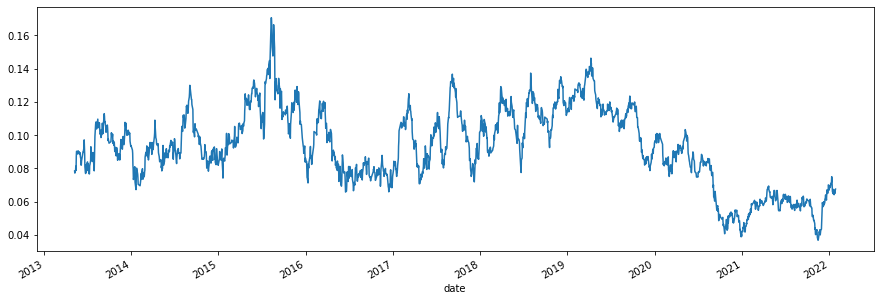

In [66]:
IC_20.rolling(30).mean().plot(figsize = (15,5))

In [41]:
IC_40 = IC_alphamodel.groupby('date').apply(lambda x:x['resid_pred_40'].corr(x['resid'],method='spearman'))

In [67]:
IC_40.mean()

0.10087504159937927

In [68]:
250**0.5*IC_40.mean()/IC_40.std()

23.820145244958354

<AxesSubplot:xlabel='date'>

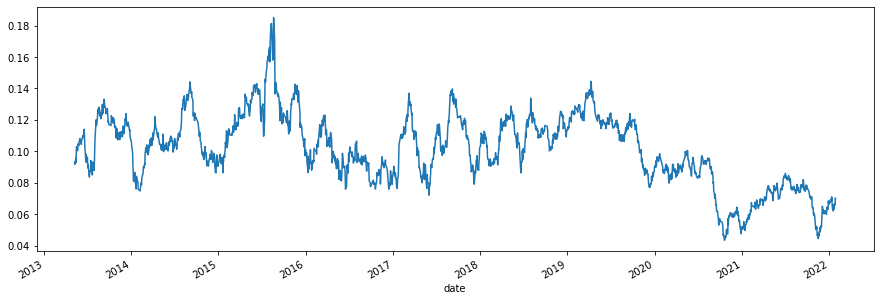

In [81]:
IC_40.rolling(30).mean().plot(figsize = (15,5))

In [43]:
IC_60 = IC_alphamodel.groupby('date').apply(lambda x:x['resid_pred_60'].corr(x['resid'],method='spearman'))

In [69]:
IC_60.mean()

0.09975604401956341

In [70]:
250**0.5*IC_60.mean()/IC_60.std()

24.665746621533145

<AxesSubplot:xlabel='date'>

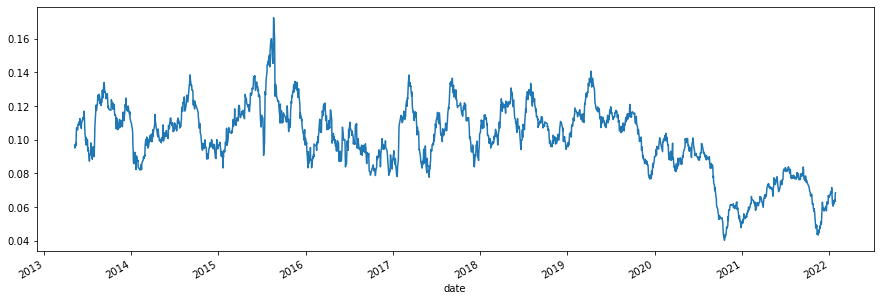

In [80]:
IC_60.rolling(30).mean().plot(figsize = (15,5))

In [46]:
IC_80 = IC_alphamodel.groupby('date').apply(lambda x:x['resid_pred_80'].corr(x['resid'],method='spearman'))

In [71]:
IC_80.mean()

0.10046680677651697

In [72]:
250**0.5*IC_80.mean()/IC_80.std()

26.11364969976536

<AxesSubplot:xlabel='date'>

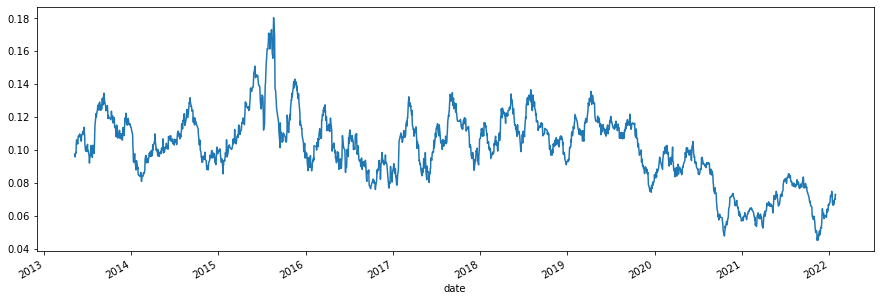

In [79]:
IC_80.rolling(30).mean().plot(figsize = (15,5))

In [47]:
IC_100 = IC_alphamodel.groupby('date').apply(lambda x:x['resid_pred_100'].corr(x['resid'],method='spearman'))

In [73]:
IC_100.mean()

0.09823886109442101

In [74]:
250**0.5*IC_100.mean()/IC_100.std()

25.978474130961736

<AxesSubplot:xlabel='date'>

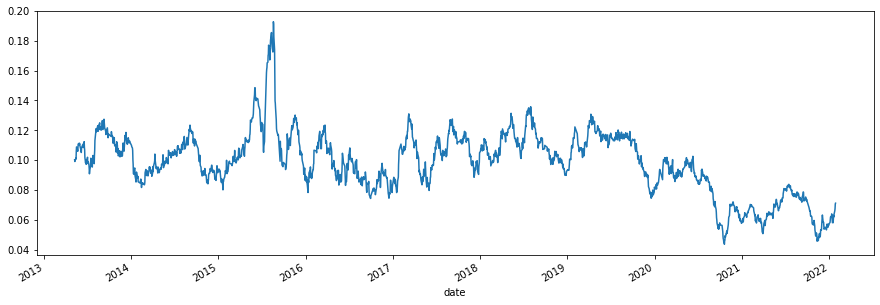

In [78]:
IC_100.rolling(30).mean().plot(figsize = (15,5))

In [48]:
IC_120 = IC_alphamodel.groupby('date').apply(lambda x:x['resid_pred_120'].corr(x['resid'],method='spearman'))

In [75]:
IC_120.mean()

0.09609748590633102

In [76]:
250**0.5*IC_120.mean()/IC_120.std()

25.56941554776328

<AxesSubplot:xlabel='date'>

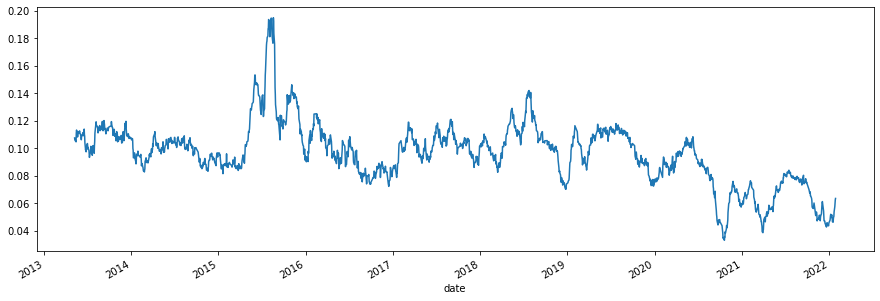

In [77]:
IC_120.rolling(30).mean().plot(figsize = (15,5))

### **错误计算：250日时间序列滚动回归**